In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

feature_name_df = pd.read_csv(url, sep='\s+', header=None, names=['column_index', 'column_name'])

feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [4]:
len(feature_name_df)

561

In [5]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [6]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


In [9]:
X_train.columns = feature_name
X_test.columns = feature_name

X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [10]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [12]:
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
Name: count, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=17)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

In [15]:
accuracy_score(y_test, pred)

0.8096369189005769

In [16]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=17),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [17]:
grid_cv.best_score_

0.8512050204174123

In [18]:
grid_cv.best_params_

{'max_depth': 8}

In [19]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [21]:
cv_result_df = cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]
cv_result_df

,param_max_depth,mean_test_score,mean_train_score
0,6,0.844126,0.944879
1,8,0.851205,0.982692
2,10,0.846718,0.993403
3,12,0.844134,0.997212
4,16,0.846584,0.999660
5,20,0.843727,0.999966
6,24,0.844542,1.000000


In [23]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Max_depth =', depth, 'Accuracy =', accuracy)

Max_depth = 6 Accuracy = 0.8557855446216491
Max_depth = 8 Accuracy = 0.8707159823549372
Max_depth = 10 Accuracy = 0.8673227010519172
Max_depth = 12 Accuracy = 0.8646080760095012
Max_depth = 16 Accuracy = 0.8574821852731591
Max_depth = 20 Accuracy = 0.8547675602307431
Max_depth = 24 Accuracy = 0.8547675602307431


In [24]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.8713946386155412

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6, 8, 10],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

In [26]:
rf_clf = RandomForestClassifier(random_state=17, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

c:\Users\tmdck\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [27]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [28]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
20,1,0.914445,200,8
23,1,0.914445,200,8
27,3,0.913765,50,10
24,3,0.913765,50,10
29,5,0.913221,200,10


In [29]:
grid_cv.best_params_, grid_cv.best_score_

({'max_depth': 8,
  'min_samples_leaf': 12,
  'min_samples_split': 8,
  'n_estimators': 200},
 0.9144450489662677)

In [30]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

c:\Users\tmdck\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=8, min_samples_leaf=12, min_samples_split=8,
                       n_estimators=200, n_jobs=-1, random_state=17)

In [31]:
pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)

0.9185612487275195

In [32]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

tGravityAcc-energy()-X             0.032873
angle(X,gravityMean)               0.031918
tGravityAcc-mean()-Y               0.030458
tGravityAcc-max()-X                0.029012
tGravityAcc-min()-X                0.028799
angle(Y,gravityMean)               0.028226
tGravityAcc-mean()-X               0.026971
tGravityAcc-min()-Y                0.025172
tGravityAcc-max()-Y                0.023075
tGravityAcc-energy()-Y             0.016859
angle(Z,gravityMean)               0.012031
tGravityAcc-arCoeff()-Z,2          0.011846
fBodyAccJerk-bandsEnergy()-1,8     0.011746
fBodyAccJerk-energy()-X            0.011649
tGravityAcc-min()-Z                0.011515
fBodyAccMag-mad()                  0.010945
tBodyAccMag-std()                  0.010340
fBodyAccJerk-bandsEnergy()-1,16    0.010072
tGravityAcc-max()-Z                0.010046
fBodyAccMag-std()                  0.009982
dtype: float64

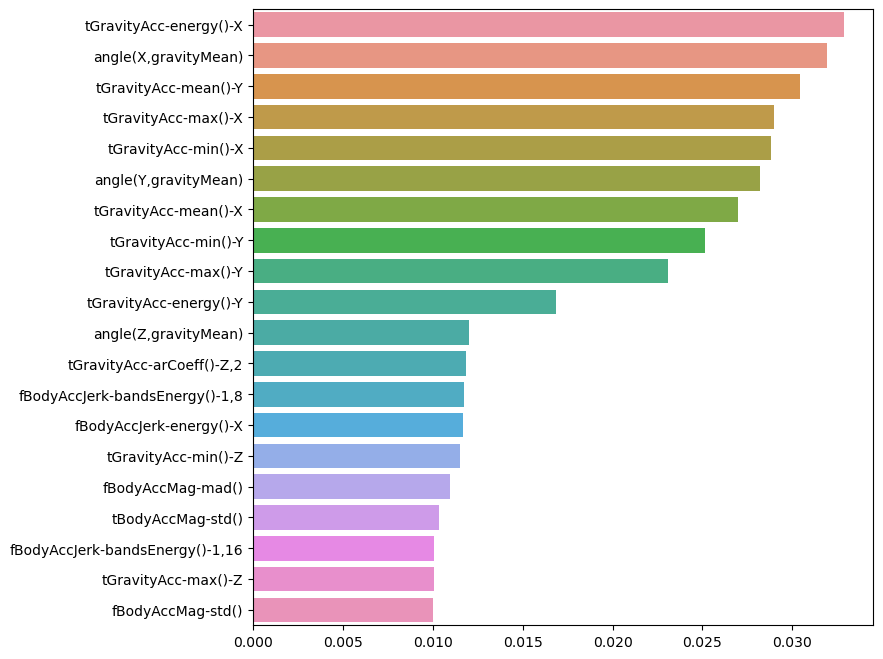

In [33]:
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show()

In [34]:
X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

In [36]:
rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re, y_train.values.reshape(-1,))

pred1_re = rf_clf_best_re.predict(X_test_re)

accuracy_score(y_test, pred1_re)

0.8120122158126909